In [1]:
!pip install xgboost

In [2]:
import xgboost as xgb
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
raw_dataset = pd.read_csv('AER_G_dataset-PTC.csv')
x = raw_dataset.iloc[:, : -1].values
y = raw_dataset.iloc[:, 11].values
raw_dataset

,DAT(days),Temp,WC,NL,N(PTC) (mg/g),P(PTC) (mg/g),K(PTC) (mg/g),Ca(PTC) (mg/g),Mg(PTC) (mg/g),S(PTC) (mg/g),Na(PTC) (mg/g),Diameter of Bulb(mm)
0,1,18.3,0.11,5.75,33.56,4.90,37.29,7.25,2.13,1.93,0.77,16.03
1,2,19.8,0.22,5.79,34.38,4.91,38.62,7.46,2.14,1.95,0.78,16.04
2,3,18.3,0.31,5.83,34.60,5.01,39.81,7.69,2.15,1.97,0.79,16.05
3,4,16.9,0.42,5.87,35.61,5.02,40.65,7.82,2.16,1.99,0.80,16.06
4,6,18.9,0.56,5.91,36.62,5.03,42.15,7.01,2.18,2.00,0.81,16.07
...,...,...,...,...,...,...,...,...,...,...,...,...
86,89,29.5,15.18,10.23,43.02,7.56,50.64,14.06,1.83,3.72,1.99,103.39
87,90,27.9,15.21,10.34,43.00,7.64,50.43,14.07,1.84,3.73,2.00,103.47
88,91,27.1,15.27,10.48,42.82,7.68,50.27,14.08,1.85,3.74,2.01,103.49
89,92,26.1,15.30,10.51,42.61,7.72,49.94,14.09,1.86,3.75,2.02,103.52


In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)


In [9]:
%%time
xgbr = xgb.XGBRegressor(verbosity=0)
#print(xgbr)

xgbr.fit(xtrain, ytrain)
 
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)
r2 = 1 - sum((ytest - ypred) ** 2)/sum((ytest - np.mean(ytest)) ** 2)
#r2 = r2_score(ytest,ypred)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))



Training score:  0.9999999983677004
Mean cross-validation score: 0.99
K-fold CV average score: 0.99
MSE: 5.98
RMSE: 2.45
Wall time: 481 ms


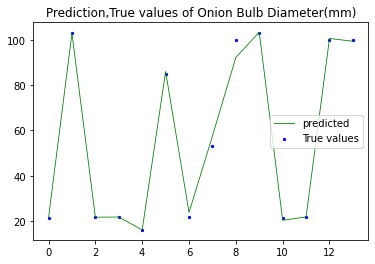

In [6]:
x_ax = range(len(ytest))
plt.title('Prediction,True values of Onion Bulb Diameter(mm)')
plt.scatter(x_ax, ytest, s=5, color="blue", label="True values")
plt.plot(x_ax, ypred, lw=0.8, color="green", label="predicted")
plt.legend()
plt.show()

In [7]:
print('ypred =',ypred)

ypred = [ 21.528963 102.758156  21.689304  21.757694  16.08015   85.971634
  23.793789  57.49505   92.196365 103.29828   20.32324   21.799212
 100.547134  99.33185 ]


In [8]:
print('r2_score = ',r2)

r2_score =  0.9957363169197625
